# Image Data Augmentation Exercise : **CIFAR-100**
---
## 데이터가 더 부족한 세상으로!

[여기 참고](https://www.cs.toronto.edu/~kriz/cifar.html)

## Keras Update

In [1]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

## Data Loading

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets.cifar100 import load_data

In [4]:
(train_x, train_y), (test_x, test_y) = load_data()
# (train_x, train_y), (test_x, test_y) = load_data(label_mode='coarse') # 클래스 개수 20개로 줄이고 싶을 때

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 80s 0us/step


In [5]:
np.unique(train_y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
label_dict = {0:'apple', 1: 'aquarium_fish', 2: 'baby', 3: 'bear', 4: 'beaver', 5: 'bed', 6: 'bee', 7: 'beetle', 8: 'bicycle', 9: 'bottle',
              10: 'bowl', 11: 'boy',12: 'bridge',13: 'bus',14: 'butterfly',15: 'camel',16: 'can',17: 'castle',18: 'caterpillar',19: 'cattle',
              20: 'chair',21: 'chimpanzee',22: 'clock',23: 'cloud',24: 'cockroach',25: 'couch',26: 'cra',27: 'crocodile',28: 'cup',29: 'dinosaur',
              30: 'dolphin',31: 'elephant',32: 'flatfish',33: 'forest',34: 'fox',35: 'girl',36: 'hamster',37: 'house',38: 'kangaroo',39: 'keyboard',
              40: 'lamp',41: 'lawn_mower',42: 'leopard',43: 'lion',44: 'lizard',45: 'lobster',46: 'man',47: 'maple_tree',48: 'motorcycle',49: 'mountain',
              50: 'mouse',51: 'mushroom',52: 'oak_tree',53: 'orange',54: 'orchid',55: 'otter',56: 'palm_tree',57: 'pear',58: 'pickup_truck',59: 'pine_tree',
              60: 'plain',61: 'plate',62: 'poppy',63: 'porcupine',64: 'possum',65: 'rabbit',66: 'raccoon',67: 'ray',68: 'road',69: 'rocket',
              70: 'rose',71: 'sea',72: 'seal',73: 'shark',74: 'shrew',75: 'skunk',76: 'skyscraper',77: 'snail',78: 'snake',79: 'spider',
              80: 'squirrel',81: 'streetcar',82: 'sunflower',83: 'sweet_pepper',84: 'table',85: 'tank',86: 'telephone',87: 'television',88: 'tiger',89: 'tractor',
              90: 'train',91: 'trout',92: 'tulip',93: 'turtle',94: 'wardrobe',95: 'whale',96: 'willow_tree',97: 'wolf',98: 'woman',99: 'worm'
            }

label_dict[0]

'apple'

* 데이터 살펴보기

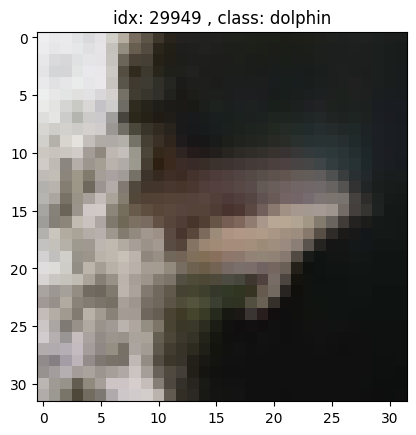

In [7]:
rand_i = np.random.randint(0, train_x.shape[0])

plt.title(f'idx: {rand_i} , class: { label_dict[train_y[rand_i][0]] }')
plt.imshow( train_x[rand_i] )
plt.show()

In [ ]:
# 100개 클래스에 대해 이미지 5개씩 가져오도록

rows = 5
fig, axes = plt.subplots(rows, len(label_dict), figsize=(len(label_dict), rows) )

for img_id in range(len(label_dict)) :
    imgs = train_x[train_y.reshape(-1)==img_id]
    imgs_len = len(imgs)

    for row_i in range(rows) :
        axe = axes[row_i, img_id]
        axe.imshow( imgs[np.random.randint(imgs_len)], interpolation='none' )
        axe.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Data Preprocessing

* Data split
    - train data를 쪼갬 -> training set : validation set = 8 : 2
    - 재현을 위한 난수 고정 : 2024

In [8]:
test_x.shape

(10000, 32, 32, 3)

In [9]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=.2, random_state=2024)

* Scaling

    - min-max scaling (선택사항)
        1. RGB 정보 전체를 min-max
        2. R 따로 G 따로 B 따로 min-max, 그 후 하나로 통합

In [10]:
m = train_x.max()
n = train_x.min()
s_train_x = (train_x - n) / (m - n)
s_val_x = (val_x - n) / (m - n)
s_test_x = (test_x - n) / (m - n)

* (One-hot encoding)

In [11]:
# PASS
# class가 100개나 되므로 만약 원핫인코딩하면 y가 비효율적인 형태로 변할 것임 [1, 0, 0, 0, ..., 0, 0, 0]
# from keras.utils import to_categorical
# s_train_x = to_categorical(s_train_x, 100)
# s_val_x = to_categorical(s_val_x, 100)
# s_test_x = to_categorical(s_test_x, 100)

* Data shape 재확인

In [12]:
s_train_x.shape, train_y.shape

((40000, 32, 32, 3), (40000, 1))

## Modeling : CNN

- 조건
    1. Sequential API, Functiona API 중 택일.
    2. Image Augmentation Layer를 최소 하나 이상 넣을 것! : [공식 문서 참고](https://keras.io/api/layers/preprocessing_layers/)
    3. [이 구조를 미니 버전으로 활용해봐도 좋다.](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFA5415B38AC752E)
    4. DropOut, BatchNormalization 등의 기능도 같이 활용해보자.
    5. Early Stopping을 사용할 것.

In [13]:
from keras.backend import clear_session
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Flatten, BatchNormalization, Dropout, Conv2D, MaxPool2D

In [15]:
from keras.layers import RandomRotation, RandomZoom, RandomFlip

In [16]:
clear_session()

model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(RandomFlip(mode='vertical')) # 좌우 반전만
model.add(RandomRotation(factor=(-0.1, 0.1)))
model.add(RandomZoom(height_factor=(-0.1,0.1), width_factor=(-0.1,0.1)))
model.add(Conv2D(
    filters = 32,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu'
))
model.add(Conv2D(
    filters = 32,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu'
))
model.add(MaxPool2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(
    filters = 16,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu'
))
model.add(Conv2D(
    filters = 16,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu'
))
model.add(MaxPool2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,169,380 (4.46 MB)

 Trainable params: 1,169,284 (4.46 MB)

 Non-trainable params: 96 (384.00 B)

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.utils import plot_model

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

* Early Stopping

In [18]:
from keras.callbacks import EarlyStopping

In [19]:
es = EarlyStopping(
    monitor='val_loss',
    min_delta = 0,
    patience=5,
    verbose = 1,
    restore_best_weights = True
)

* .fit( )

In [ ]:
model.fit(s_train_x, train_y, validation_data = (s_val_x, val_y), epochs=10000, verbose=1, callbacks=[es], batch_size=128)

Epoch 1/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 155s 483ms/step - accuracy: 0.0767 - loss: 4.2369 - val_accuracy: 0.0264 - val_loss: 5.5657
Epoch 2/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 194s 460ms/step - accuracy: 0.1723 - loss: 3.4705 - val_accuracy: 0.1923 - val_loss: 3.4042
Epoch 3/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 483ms/step - accuracy: 0.2129 - loss: 3.2216 - val_accuracy: 0.2044 - val_loss: 3.4321
Epoch 4/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 157s 503ms/step - accuracy: 0.2509 - loss: 3.0219 - val_accuracy: 0.2140 - val_loss: 3.3360
Epoch 5/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 150s 480ms/step - accuracy: 0.2755 - loss: 2.9131 - val_accuracy: 0.2745 - val_loss: 2.9583
Epoch 6/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 202s 480ms/step - accuracy: 0.3027 - loss: 2.7865 - val_accuracy: 0.2583 - val_loss: 3.0873
Epoch 7/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 203s 485ms/step - accuracy: 0.3200 - loss: 2.6872 - val_accuracy: 0.2893 - val_loss: 2.9456
Epoch 8/10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 492ms/s

* .evaluate( )

In [ ]:
model.evaluate(s_test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.3036 - loss: 2.9242


[2.918978452682495, 0.3003999888896942]

* .predict( )

In [ ]:
y_pred = model.predict(s_test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step


In [ ]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
test_y_arg = test_y

In [ ]:
y_pred_arg[0]

8

In [ ]:
test_y_arg[0]

0

* 평가 지표

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(test_y_arg, y_pred_arg)

0.0064

In [ ]:
print( classification_report(test_y_arg, y_pred_arg, target_names=list(label_dict.values())) )

## Visualization

* 실제 데이터 확인

In [ ]:
rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {label_dict[test_idx[0]]}')
print(f'모델의 예측 : {label_dict[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate( list(label_dict.values()) ) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx])
plt.show()

* 틀린 이미지만 확인해보기

In [ ]:
temp = (test_y_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

In [ ]:
rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {label_dict[test_idx[0]]}')
print(f'모델의 예측 : {label_dict[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate( list(label_dict.values()) ) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx] )
plt.show()